In [2]:
import pandas as pd

In [3]:
all_data = pd.read_excel(
    r"C:\Users\zeroi\Desktop\Asignaturas\Año 3\Semestre 2\Cuantitative Macroeconomics\Fred_Data_Proyect.xlsx", sheet_name=1, index_col=0)
inflation_direct_data = all_data[["CPI_ALL_ITEMS", "M2", "M2_REAL", "M2_VELOCITY",
                                  "GDP_REAL", "FULL_TIME_NOMINAL_WEEKLY_WAGE"]].pct_change(fill_method=None)
inflation_direct_data.columns = inflation_direct_data.columns+" %"

## Best ARIMA(p,d,q) variable of a variable: 
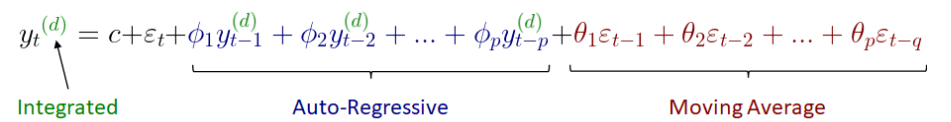

#### Some Theory

Stategy:

1. Plot data and see if it appears to have or not a unit root.
2. AR --> PACF and MA --> ACF. If PACF is close to 1, and ACF is slowly decling, some evidence of unit root
3. Do A-DF test for unit roots:

------------------------------------------------
##### Extra notes:

A particular series can be either be stationary:

A) (I(0));
 
B) Trend Stationary==Trend Deterministic: $y_t = c + \Beta t +\Theta_q (L) a_t$ -> $E(y_t) = c +\Beta t$ [This is non stationary in mean]

To make this sort of thing stationary, you shall always detrend it (if take first difference it is not invertible!):

Step 1) $y_t = c + \Beta t + \Theta_q (L) a_t$ -> Estimate $c,\Beta$ with MCO 

Step 2) $y_t - \hat c - \hat \Beta t = \hat \Theta_q (L) \hat a_t $ -> Now this follows some sort of ARMA(p,q)

C) Difference Stationary == Unit roots with drift: $y_t = c+ y_{t-1} + a_t$ -> Bascilly, always take first difference to make it stationary and you are done. [Non stationary in mean and variance]

------------------------------------------------

**Escribano Notes**

Basically, there are 3 testes here for $H_0: \gamma = 0$ which follows a D-F distribution. If we accept the $H_0$ in any of the cases we got:

(1) $\Delta y_t=\gamma y_{t_1}+a_t$  -> $\Delta y_t=a_t$ -> $y_t=c_0+y_{t-1}+a_t$ [Random Walk:"Unpredictable with linear model"] -> First difference is fine

(2) $\Delta y_t=\alpha + \gamma y_{t_1}+a_t$ -> $\Delta y_t=\alpha + a_t$ -> $y_t=c_0+\alpha t+y_{t-1}+a_t$ [Linear Trend] -> Must detrend

(3) $\Delta y_t=\alpha + \Beta t +\gamma y_{t_1}+a_t$ -> $\Delta y_t=\alpha + \Beta t + a_t$ -> $y_t=c_0+\alpha t + \beta t^2 +y_{t-1}+a_t$ [Non Linear Trend] -> Must detrend as well I guess.

------------------------------------------------
*** my views on the above weird stuff

Or rather, to me it makes more sense this, so I am kind of confused. If we reject H0 (H0 is basically: There is unit root if you control for trend and constant, for constant or for none of that):

(1*) $\Delta y_t=\gamma y_{t_1}+a_t$  -> $\Delta y_t=a_t$ -> $y_t=y_{t-1}+a_t$ [Pure Random Walk with no cte:"Unpredictable with linear model"] -> First difference is fine   [Jesus Gonazlo said this is basically not used for some sort of identification problem]

(2*) $\Delta y_t=\alpha + \gamma y_{t_1}+a_t$ -> $\Delta y_t=\alpha + a_t$ -> $y_t=c_0+y_{t-1}+a_t$ First difference is fine [This is also Random Walk, but with cte,i.e., is a Random Walk with Drift]

(3*) $\Delta y_t=\alpha + \Beta t +\gamma y_{t_1}+a_t$ -> $\Delta y_t=\alpha + \Beta t + a_t$ -> $y_t=c_0 + \Beta t +y_{t-1}+a_t$ [Linear Trend] -> Must detrend before taking first difference.

Now, say we do not reject $H_0$, this does not tell us that there IS such a alpha or such a cte as assumed above. So we must in all cases apply the steps 2 and 4 as described by Escribano below, i.e., if we say reject $H_0$ for (3*), estimate the appropiate model as descirbe below (assuming $\gamma=0$) and test for the significance of the trend ($\Beta$). The rest of the procedure follow as Escribano dictates.

Also, say WE DO REJECT $H_0$ for (3*), I do not think this guarantees there is no linear trend (it just guarantee there is no unit root!), so we must still test the significance of the respective trend (with the same amout of lags as in the previous case for WN purposes), but now assuming there is not unit root.

In principle, for me the correct procedure as describe below is correct btw, what I am saying is that the "Data Generating Model" are this ones and not the one above

------------------------------------------------
 

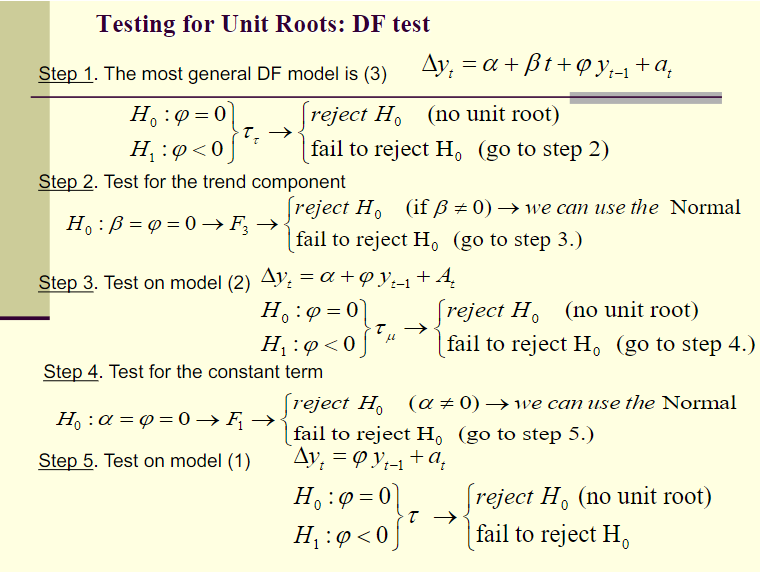

Notes:
- With "We can use normal" it means that we can compute the parameter $\gamma$ significancy in each part with the normal dsitribution rather than D-F, and see wheater to reject or not the unit root now with the normal distribution also.
- When doing the test for $\Beta$ and $\gamma$ significancy, you essentially compute the OLS test for: 
$$\Delta y_t = alpha + \Beta t + m_1 \Delta y_t-1 +....$$ 

And use as many differences of $\Delta y_{t_i}$ lags as were necessary in A-DF test to make the residuals of the general model at each step WN

4. Make the model series via the results of the previous test stationary (d=0,d=1,...).
5. Search for models ARIMA(p,d,q) that gives you WN residuals (no autocorrelation in the residuasl). You can test WN residuals via Box-Pierce or Ljung-Box statistics that has "there is WN" as the $H_0$. You can search for models via the Box-Pierce methodology (minimal model that produces WN and possibly significant coefficients) or via General to Particular methodology (start with many lags and remove till we got a decent model). 
6. Selcect the best ARIMA model: Smallest MS2C, test de Diebold-Mariano (see whether  one model has less variance than another), Select models via lower IC (variance of residuasl corrected by the numbers of the parameters used to estimate the model) [BIC=Schwarz, AIC]
7. Make a pondered averege of the varaince of the residuals of the models when doing predictions, such as when doing the predictions the "all encompassing model" has all variables. (To be continue)




### Example

##### 1-2- It looks kind of stationary, with mean around 0.01 or 1% inflation, but is kind of hard to really tell....

<Axes: xlabel='date'>

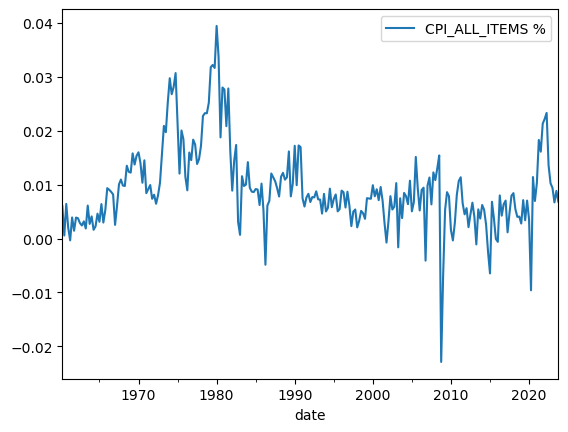

In [651]:
inflation = inflation_direct_data[["CPI_ALL_ITEMS %"]].dropna()
inflation.plot()

Figure(640x480)
Figure(640x480)


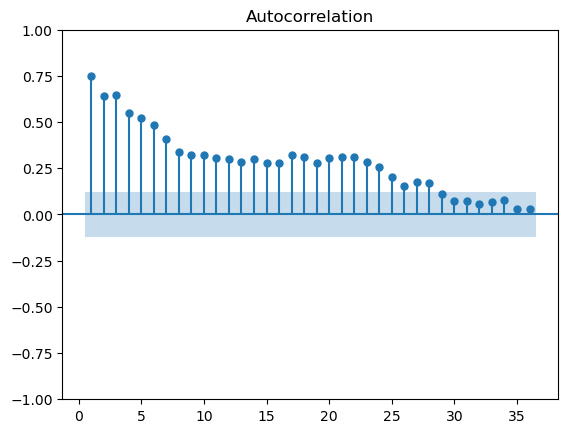

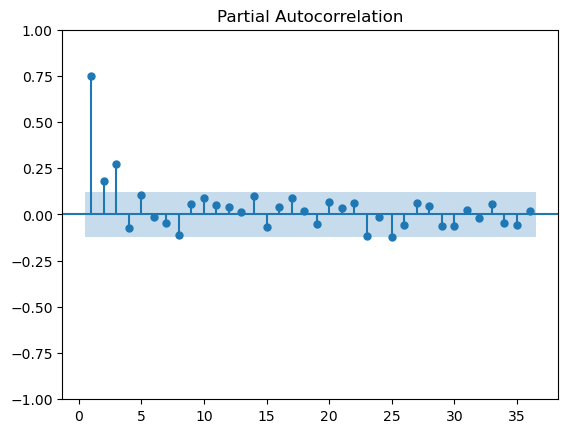

In [6]:
import statsmodels.graphics.tsaplots as smgt

print(smgt.plot_acf(inflation, bartlett_confint=False, lags=36, zero=False))
print(smgt.plot_pacf(inflation, lags=36, zero=False))

In [26]:
# ADF test as seen in class
# ADF test as seen in class
def ADF_test(timeseries, IC="bic", significance=0.01):
    """
    Performs Augmented Dickey-Fuller (ADF) test with additional outputs.

    Args:
        timeseries (array-like): The time series data to be tested.
        IC (str): Information criterion to use for selecting the lag order. ["bic","aic"]
        significance (float): Significance level for hypothesis testing.

    Returns:
        Analysis of unit root type

    """
    import warnings
    warnings.simplefilter('ignore', category=UserWarning)
    from arch.unitroot import ADF
    import statsmodels.tsa.arima.model as smt

    # Step 1: Perform ADF test with constant and trend
    print("Step 1: Performing ADF test with constant and trend...")
    adf = ADF(timeseries, trend="ct", method=IC)
    print("Results of Dickey-Fuller Test:")
    print(f"       p-value of the test: {adf.pvalue}.")
    if adf.pvalue < significance:
        print(
            "       Conclusion: We reject the null hypothesis -> [The series has no unit root, it might still have trend]")
    else:
        print("       We do not reject the null hypothesis -> Proceeding to step 2...")
        # Step 2: Test for the significance of the trend given no unit root
        print("Step 2: Testing for the significance of the trend given no unit root...")
        model_2 = smt.ARIMA(endog=timeseries.diff(),
                            order=(adf.lags, 0, 0), trend="ct").fit(cov_type="robust")
        p_value_trend = model_2.pvalues["x1"]
        print("Results of the contrast:")
        print(f"       p-value of the contrast: {p_value_trend}")
        if p_value_trend < significance:
            print(
                "       Conclusion: We reject the null hypothesis -> Might try again to see whether the unit root is significant, but with a normal distribution (see below output) -> [Model: Unit Root with c and t][Trend Stationary: y_t=alpha+beta*t+y_{t-1}+epsilon_t]")
            print(adf.regression.summary())
            print("Info: These p-values are computed over the normal distribution. Errors are WN. Look at Level.L1 significance to determine whether there is a Unit Root (null hypothesis) or not as described above.")
        else:
            print(
                "       We do not reject the null hypothesis -> Proceeding to step 3...")
            # Step 3: Perform ADF test with only a constant
            print("Step 3: Performing ADF test with only a constant...")
            print("Results of Dickey-Fuller Test:")
            adf = ADF(timeseries, method=IC, trend="c")
            print(f"       p-value of the test: {adf.pvalue}.")
            if adf.pvalue < significance:
                print(
                    "       Conclusion: We reject the null hypothesis -> [The series has no unit root, it might still have trend]")
            else:
                print(
                    "       Can't reject the null hypothesis -> Proceeding to step 4...")
                # Step 4: Test for the significance of the constant given no unit root and no trend
                print(
                    "Step 4: Testing for the significance of the constant given no unit root and no trend...")
                model_3 = smt.ARIMA(endog=timeseries.diff(),
                                    order=(adf.lags, 0, 0), trend="c").fit(cov_type="robust")
                p_value_const = model_3.pvalues["const"]
                print("Results of the contrast:")
                print(f"       p-value of the contrast: {p_value_const}")
                if p_value_const < significance:
                    print(
                        "         Conclusion: We reject the null hypothesis -> Might try again to see whether the unit root is significant, but with a normal distribution (see below output) -> [Model: Unit Root with c and no t][White Noise with Drift: y_t= alpha + y_{t-1} + epsilon_t]")
                    print(adf.regression.summary())
                    print("Info: These p-values are computed over the normal distribution. Errors are WN. Look at Level.L1 significance to determine whether there is a Unit Root (null hypothesis) or not as described above.")
                else:
                    print(
                        "       We do not reject the null hypothesis -> Proceeding to step 5...")
                    # Step 5: Perform ADF test with no constant and no trend
                    print(
                        "Step 5: Performing ADF test with no constant and no trend...")
                    adf = ADF(timeseries, method=IC, trend="n")
                    print("Results of Dickey-Fuller Test:")
                    print(f"       p-value of the test: {adf.pvalue}.")
                    if adf.pvalue < significance:
                        print(
                            "       Conclusion: We reject the null hypothesis -> [The series has no unit root, it might still have trend]")
                    else:
                        print(
                            "       Conclusion: We do not reject the null hypothesis ->[The model has a unit root with no constant or trend]=[Pure White Noise: y_t= y_{t-1} + epsilon_t].")


ADF_test(inflation, significance=0.05)

Step 1: Performing ADF test with constant and trend...
Results of Dickey-Fuller Test:
       p-value of the test: 0.03056053081610878.
       Conclusion: We reject the null hypothesis -> [The series has no unit root, it might still have trend]


##### 3- Well, the ADF algorithm tells us there is no unit root, so we are pretty lucky. (Note: This can be improve with Peron test and so forth, for later, in python there is no such implementation...)

In [33]:
# Other nice stuff with regards to ADF...
from arch.unitroot import ADF
adf = ADF(inflation, trend="ct", method="bic")
print(adf.summary())
print(adf.regression.summary())

   Augmented Dickey-Fuller Results   
Test Statistic                 -3.592
P-value                         0.031
Lags                                2
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -4.00 (1%), -3.43 (5%), -3.14 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     17.55
Date:                Wed, 27 Mar 2024   Prob (F-statistic):           1.09e-12
Time:                        03:54:34   Log-Likelihood:                 989.96
No. Observations:                 252   AIC:                            -1970.
Df Residuals:                     247   BIC:            

##### 4 and 5- Basically, all models that have: 1 - WN, 2- Mostly significant params, are valid models. From this me might chose the ones that better predict stuff (lowest IC values, lowest MCE or residuals, Debold-Mariano)

Note: Q value not good here. Must be ajusted for degrees of freedoom....

In [34]:
import statsmodels.tsa.arima.model as smta
import warnings
import statsmodels.stats.diagnostic as smsd

warnings.simplefilter('ignore', category=UserWarning)
# Valid model estimated by hand
model_0 = smta.ARIMA(endog=inflation, order=(7, 0, 2)).fit(cov_type="robust")
print(model_0.summary())
print("Q_stat:", smsd.acorr_ljungbox(model_0.resid,
      model_df=4, boxpierce=False).lb_pvalue[5])

model_1 = smta.ARIMA(endog=inflation, order=(0, 0, 7)).fit(cov_type="robust")
print(model_1.summary())
print("Q_stat:", smsd.acorr_ljungbox(model_1.resid,
      model_df=7, boxpierce=False).lb_pvalue[8])

                               SARIMAX Results                                
Dep. Variable:        CPI_ALL_ITEMS %   No. Observations:                  255
Model:                 ARIMA(7, 0, 2)   Log Likelihood                1003.077
Date:                Wed, 27 Mar 2024   AIC                          -1984.153
Time:                        03:54:39   BIC                          -1945.199
Sample:                    04-01-1960   HQIC                         -1968.484
                         - 10-01-2023                                         
Covariance Type:               robust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0091      0.002      5.002      0.000       0.006       0.013
ar.L1          0.3382      5.769      0.059      0.953     -10.969      11.646
ar.L2          0.1650      4.764      0.035      0.9

In [35]:
# Best Model Selection Function (supposing already d=0)

import statsmodels.tsa.arima.model as smta



def all_best_arma_model_order(series, max_order=5, significance=0.05):
    """

































    Determines the optimal ARMA order for a given time series.


































    This function iterates through different combinations of AR(p) and MA(q)

































    orders, fits ARIMA models, and evaluates them using statistical tests

































    and information criteria. The best order is chosen based on model

































    significance and the Akaike Information Criterion (AIC).


































    Args:

































        series (pandas.Series): The time series data.

































        max_order (int, optional): The maximum order to consider for both AR and MA components. 

































                                   Defaults to 5.

































        significance (float, optional): The significance level for statistical tests. 

































                                        Defaults to 0.05.


































    Returns:

































        tuple: The optimal ARMA order as a tuple (p, d, q), where 'd' is assumed to be 0.

































    """

    import statsmodels.stats.diagnostic as smsd
    import statsmodels.tsa.arima.model as smta


    import warnings
    import pandas as pd


    import numpy as np

    warnings.simplefilter('ignore', category=UserWarning)


    candidate_orders = []

    white_noise_pvalues = []

    coefficient_pvalues = []

    aic_values = []


    for p in range(1, max_order + 1):

        for q in range(max_order + 1):

            order = (p, 0, q)  # Assuming d=0 for ARIMA

            candidate_orders.append(order)


            model = smta.ARIMA(series, order=order).fit(cov_type="robust")


            white_noise_pvalues.append(smsd.acorr_ljungbox(

































                model.resid, lags=p+q+1, model_df=p + q, boxpierce=False).lb_pvalue[p+q+1])

            coefficient_pvalues.append(model.pvalues[:-1].to_numpy())

            aic_values.append(model.aic)

    for q in range(1, max_order+1):

        order = (0, 0, q)  # Assuming d=0 for ARIMA

        candidate_orders.append(order)


        model = smta.ARIMA(series, order=order).fit(cov_type="robust")


        white_noise_pvalues.append(smsd.acorr_ljungbox(

































            model.resid, lags=q+1, model_df=q, boxpierce=False).lb_pvalue[q+1])

        coefficient_pvalues.append(model.pvalues[:-1].to_numpy())

        aic_values.append(model.aic)

    # Create DataFrame for model comparison

    results_df = pd.DataFrame((candidate_orders, white_noise_pvalues, coefficient_pvalues, aic_values

































                               )).T

    results_df.columns = ['order', 'white_noise_pvalue',

































                          'coefficient_pvalues', 'aic']


    # Filter for significant models

    print(f"{len(results_df['order'])} distinct models considered...")


    results_df = results_df[results_df['white_noise_pvalue'] >= significance]

    results_df['all_coeffs_significant'] = results_df['coefficient_pvalues'].apply(

































        lambda x: np.all(x <= significance))

    significant_models = results_df[results_df['all_coeffs_significant']]

    # Select the model with the lowest AIC among significant models

    optimal_orders = significant_models['order']


    """

































    if not significant_models.empty:

































        optimal_order = significant_models.loc[significant_models['aic'].idxmin(), 'order']

































    else:

































        optimal_order = "None"  # Handle the case where no significant models are found

































    """

    if optimal_orders.empty:

        optimal_orders = "None is good enough according to the criteria of this function."

    else:

        optimal_orders = optimal_orders
    return optimal_orders



# Example usage (Make sure you have a 'series' variable defined)
if __name__ == "__main__":


    m2v = inflation_direct_data["CPI_ALL_ITEMS %"].dropna()

    best_orders = all_best_arma_model_order(m2v, max_order=5)

    print("Optimal model:", best_orders)


model_2 = smta.ARIMA(endog=inflation, order=best_orders.iloc[0]).fit(

































    cov_type="robust")


model_2.summary()

35 distinct models considered...
Optimal model: 3    (1, 0, 3)
Name: order, dtype: object


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:        CPI_ALL_ITEMS %   No. Observations:                  255
Model:                 ARIMA(1, 0, 3)   Log Likelihood                1001.894
Date:                Wed, 27 Mar 2024   AIC                          -1991.787
Time:                        03:55:08   BIC                          -1970.539
Sample:                    04-01-1960   HQIC                         -1983.240
                         - 10-01-2023                                         
Covariance Type:               robust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0091      0.002      5.554      0.000       0.006       0.012
ar.L1          0.8706      0.050     17.344      0.000       0.772       0.969
ma.L1         -0.2759      0.071     -3.909      0.000      -0.414      -0.138
ma.L2         -0.1886      0.057     -3.315      0.001      -0.300      -0.077
ma.L3          0.2174      0.091      2.378      0.017       0.038       0.397
sigma2      2.253e-05   5.36e-06      4.203      0.000     1.2e-05     3.3e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1770.03
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               2.41   Skew:                            -1.74
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.43
===================================================================================

Warnings:
[1] Quasi-maximum likelihood covariance matrix used for robustness to some misspecifications; calculated using the observed information matrix (complex-step) described in Harvey (1989).
"""

##### TAR, STAR, ESTAR (NOT AVAIABLE)

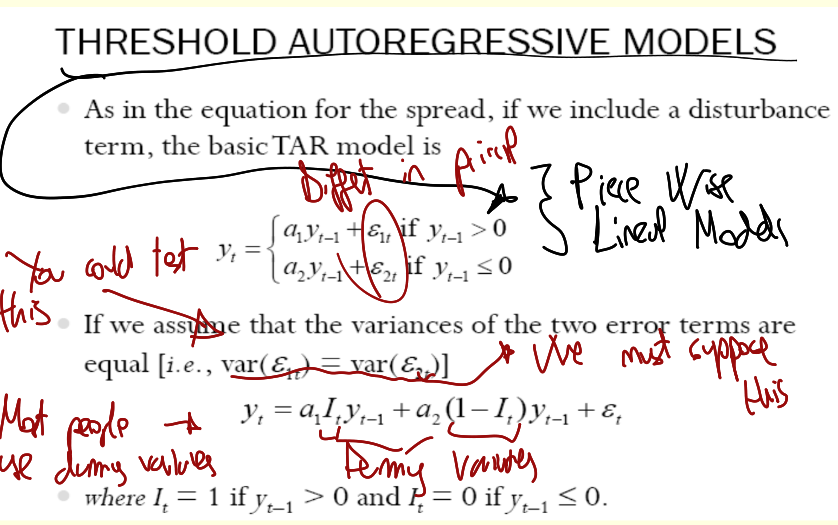

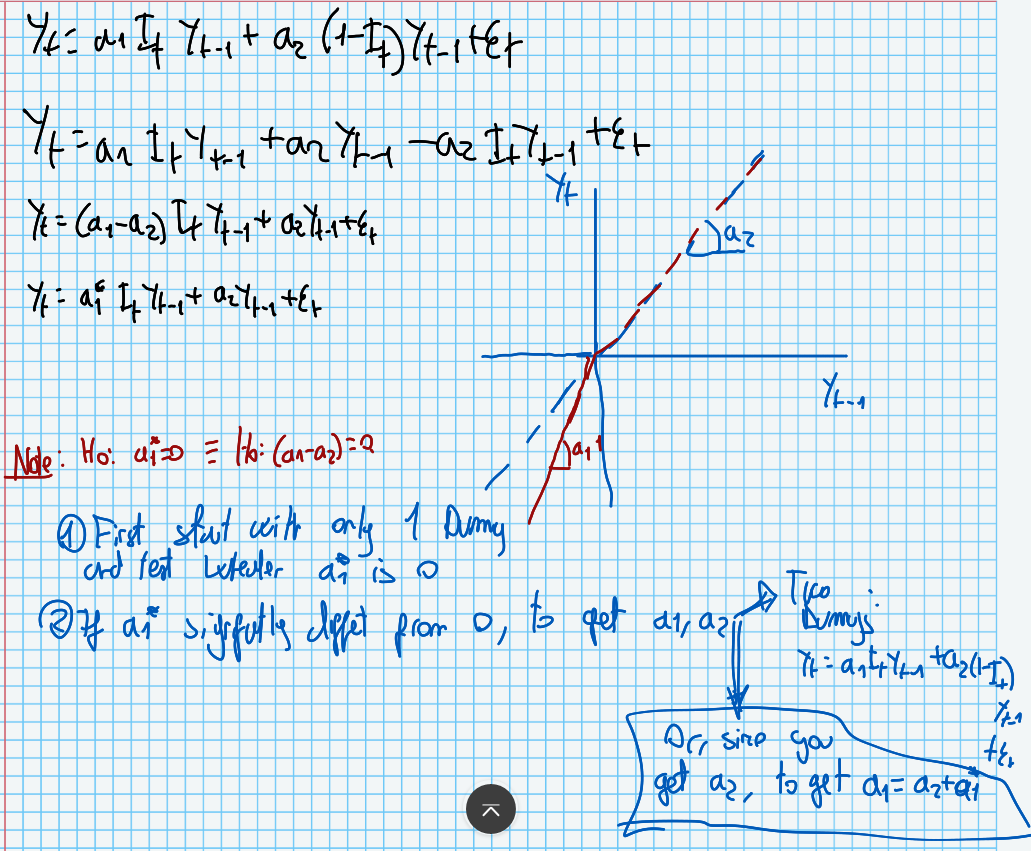

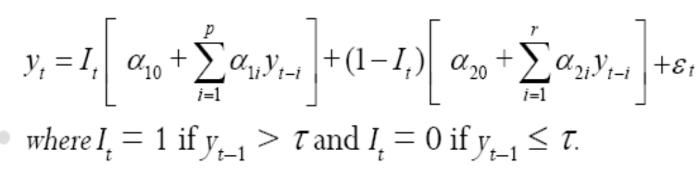

Now, apps like Eviews basically determine the number of Threshold and the values of the threshold via some sort of tests (like Bai-Perron Sequential L+1 VS L determined threshold). Sadly, there appears to be no such TAR model for common python packages. Neither there is STAR, ESTAR. So wait for R or EVIEWS if you want to use those...

##### 4-5 (2)- Forcasts, simulations, and other stuff

Impulse Response--> To be continue

Simulate

<Axes: xlabel='date'>

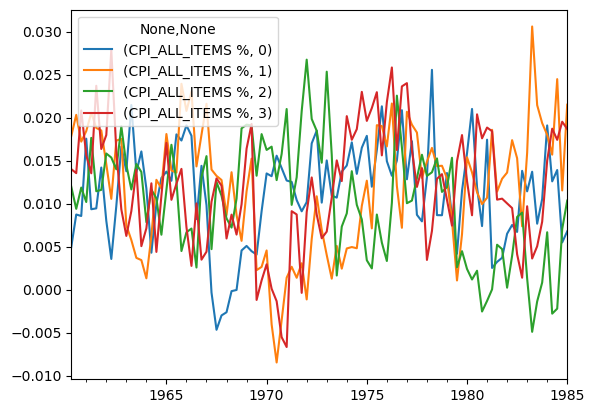

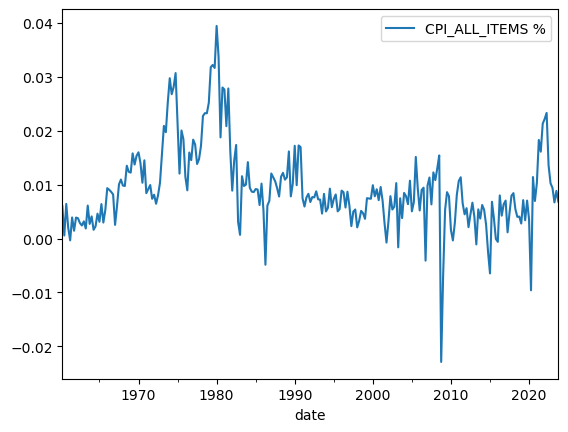

In [ ]:
# I guess different values of inflation or something
# Basically, it generates data that have similar properties to the real series (inflation) used to estimate the model.
model_2.simulate(nsimulations=100,  # Number of values to simulate
                 repetitions=4,  # Number of possible datasets to simulate
                 ).plot()
inflation.plot()

Predictions and forcast

<Axes: >

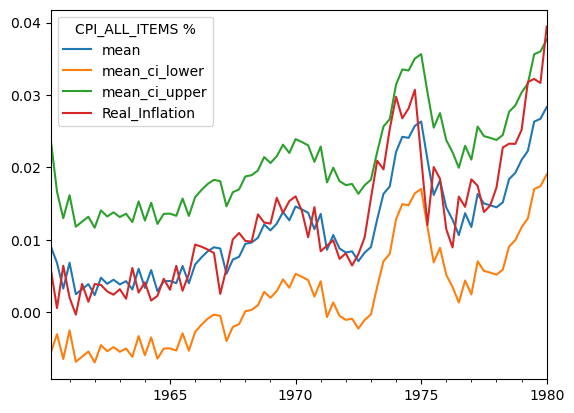

In [ ]:
import matplotlib.pyplot as plt
# preds
# predicton_mean, row_labels,se_mean,tvalues,var_pred_mean,t_test,conf_int,summary_frame
Prediction_Results_2 = model_2.get_prediction(end="1980-01-01").summary_frame()
del Prediction_Results_2["mean_se"]
Prediction_Results_2["Real_Inflation"] = inflation
Prediction_Results_2.plot()

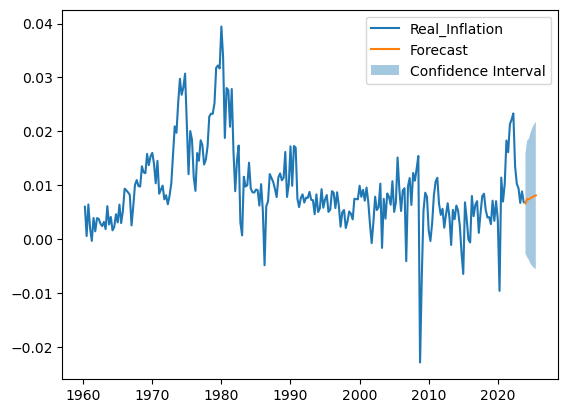

In [ ]:
# Replace n with the number of steps to forecast
# Prediction_Results_2_2 = model_2.get_forecast(steps=10)
# forecast_2.summary_frame()

Prediction_Results_2_2 = model_2.get_forecast(7)
forecast_2 = Prediction_Results_2_2.predicted_mean
forecast_conf_int_2 = Prediction_Results_2_2.conf_int(alpha=0.05)
plt.plot(inflation.index, inflation.values, label='Real_Inflation')
plt.plot(forecast_2.index, forecast_2, label='Forecast')
plt.fill_between(forecast_2.index, forecast_conf_int_2.iloc[:, 0],
                 forecast_conf_int_2.iloc[:, 1], alpha=0.4, label='Confidence Interval')
plt.legend()
plt.show()

Simulate a particular arma. Must write the polynomial coefficientes:
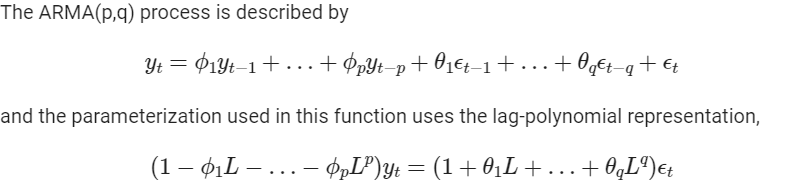

<Axes: >

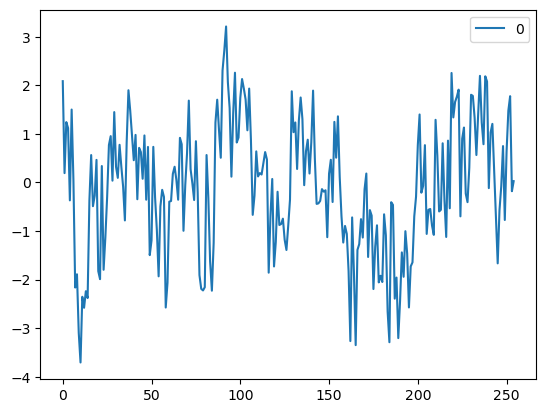

In [ ]:
# Simulate a particular ARMA model given a specific lag-polynomial
from statsmodels.tsa.arima_process import ArmaProcess
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(239)  # with this the process is stationary and invertible
arparams = [1, *-np.random.uniform(size=3)]
maparams = [1, *np.random.uniform(size=4)]
arma_process = ArmaProcess(ar=arparams, ma=maparams, nobs=100)
generated_process = pd.DataFrame(arma_process.generate_sample(nsample=100))

# Create simulation from coefficients of previously trained model

arma_process_2 = ArmaProcess.from_coeffs(
    arcoefs=model_2.arparams, macoefs=model_2.maparams, nobs=200)
generated_process_2 = pd.DataFrame(
    arma_process_2.generate_sample(nsample=len(inflation)))
generated_process_2.plot()

##### 6- Test to see best model with Diebold-Mariano. When doing this test we ofc suppose white noise.

Idea: We want to do the contrast - >Say we got model (1) and model (2), $H_0: MSE(1) =MSE(2) == var(e^{(1)}_t)=var(e^{(2)}_t)==$ by stationarity, $var(e_t^{(1)})=var(e_t^{(2)})$ 

Now, $E((e_t^{(1)}+e_t^{(2)})(e_t^{(1)}-e_t^{(2)}))=E(e^2_{t(1)}-e^2_{t(2)})-2 E(e^{(1)}_te^{(2)}_t)$, if the errors of predictions are UNBIASED, UNAUTOCORRELATED AND **THE DIISTINCT MODELS RESIDUALS ARE UNCORRELATED BETWEEN THE DISTINCT MODELS**, $E(e^2_{(1)}-e^2_{(2)})=var(e^{(1)}_t)-var(e^{(2)}_t)$. 

Say d=$E(e^2_{(1)}-e^2_{(2)})$--> $H_0: d=0$ (We do not know wheater model 1 is better than 2, so we might just assume that both are equal), vs $H_1: d \neq 0$ (There is evidence a model is better than the other. In this case, if t_value is positive, it means 2 is better than 1 (less variance of residual), and if t_value is negative 1 is better than 2.

In [978]:
# DM test for multiple models
def dm_test(timeseries=None, power=2, **model_preds):
    """
    Perform Diebold-Mariano test for predictive accuracy comparison.

    Parameters:
    - timeseries (DataFrame): Actual time series data.
    - power (int): Power for residuals calculation.
    - **model_preds: Dictionary of model predictions.

    Returns:
    - DataFrame: Results of the Diebold-Mariano test including t-values and p-values.
    """

    import pandas as pd
    from itertools import combinations
    from statsmodels.api import OLS

    # Combine model predictions into a single DataFrame
    predictions_df = pd.concat([pd.DataFrame(pred).reset_index(
        drop=True) for pred in model_preds.values()], axis=1)
    predictions_df.columns = model_preds.keys()

    # Prepare the actual time series data
    timeseries_df = pd.DataFrame(timeseries).reset_index(drop=True)

    # Calculate squared residuals
    residuals_matrix_sq = (timeseries_df.to_numpy() - predictions_df) ** power

    # Generate combinations of model pairs for comparison
    residuals_matrix_combinations = combinations(
        residuals_matrix_sq.columns, 2)
    possible_combinations = [
        f"(e_{col1})^2-(e_{col2})^2" for col1, col2 in residuals_matrix_combinations]

    # Calculate t-values and p-values for each pair of models
    t_value_list = []
    p_value_list = []
    for pair in combinations(residuals_matrix_sq.columns, 2):
        col1, col2 = pair
        d = residuals_matrix_sq[col1] - residuals_matrix_sq[col2]
        model = OLS(endog=d, exog=pd.DataFrame({"c0": [1] * len(d)})).fit()
        p_value_list.append(model.t_test("c0=0", use_t=True).pvalue)
        t_value_list.append(model.t_test("c0=0", use_t=True).statistic[0][0])

    # Create output DataFrame with t-values and p-values indexed by model pair combinations
    output = pd.DataFrame(
        {"t_value": t_value_list, "p_value": p_value_list}, index=possible_combinations)

    return output


# Example usage
mm = dm_test(timeseries=inflation, model_0=model_0.predict(),
             model_1=model_1.predict())
mm

,t_value,p_value
(e_model_0)^2-(e_model_1)^2,-0.202688,0.8395409313376836
